In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:

import pandas as pd
pd.__version__  # for the record

'1.0.3'

In [3]:
df = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(2)
df.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
#%matplotlib qt
import mplfinance as mpf
import matplotlib.pyplot as plt

In [5]:
tdf = df.iloc[0:20]
import numpy as np

#### char101 commented 8 hours ago
### "An example on how to add percentage on top/bottom of the candlebars"

In [6]:
def _add_candlestick_labels(ax, ohlc):
    transform = ax.transData.inverted()
    # show the text 10 pixels above/below the bar
    text_pad = transform.transform((0, 10))[1] - transform.transform((0, 0))[1]
    percentages = 100. * (ohlc.Close - ohlc.Open) / ohlc.Open
    kwargs = dict(horizontalalignment='center', color='#000000')
    for i, (idx, val) in enumerate(percentages.items()):
        if val != np.nan:
            row = ohlc.loc[idx]
            open = row.Open
            close = row.Close
            if open < close:
                ax.text(i, row.High + text_pad, np.round(val, 1), verticalalignment='bottom', **kwargs)
            elif open > close:
                ax.text(i, row.Low - text_pad, np.round(val, 1), verticalalignment='top', **kwargs)

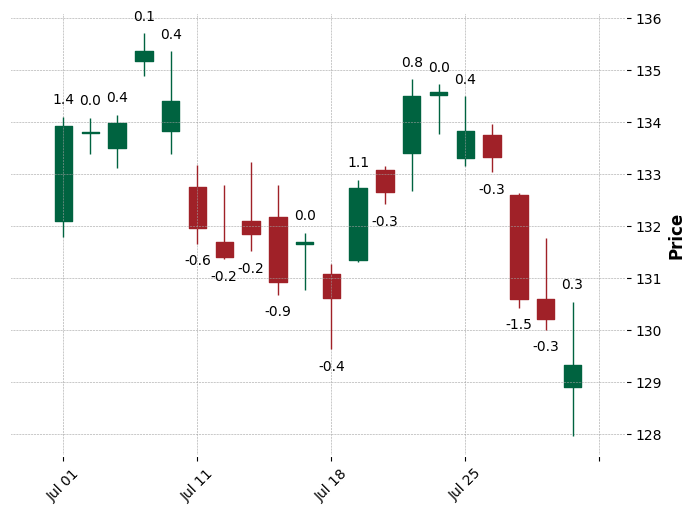

In [7]:
fig,ax = mpf.plot(tdf,type='candle',returnfig=True,style='charles',figscale=1.1)

_add_candlestick_labels(ax[0], tdf)